<a href="https://colab.research.google.com/github/jeromechen99/MachineLearning/blob/master/simulating_roll_dices_two_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
def single_die():
    """Outcome of a single die roll"""
    return random.randint(1,6)


Object `randint` not found.


In [ ]:
for _ in range(50):
    print(single_die(),end=' ')

6 2 4 5 5 1 5 3 3 1 1 4 1 5 5 5 6 2 2 5 1 4 3 6 2 4 4 3 6 1 3 5 4 5 3 1 1 3 5 5 4 1 4 4 5 3 4 5 1 6 

In [ ]:
def dice_roll(dice_count):
    """Outcome of a rolling dice_count dice
    
    Args:
        dice_count (int): number of dice to roll
    
    Returns:
        int: sum of face values of dice
        
    """
    out = 0
    for _ in range(dice_count):
        out += single_die()
    return out

In [ ]:
for _ in range(10):
    print(dice_roll(12), end=' ')

52 57 45 44 35 55 42 49 41 41 

In [ ]:
def dice_rolls(dice_count, rolls_count):
    """Return list of many dice rolls
    
    Args:
        dice_count (int): number of dice to roll
        rolls_count (int): number of rolls to do
        
    Returns:
        list: list of dice roll values.
        
    """
    out = []
    for _ in range(rolls_count):
        out.append(dice_roll(dice_count))
    return out

print(dice_rolls(2,100))

[2, 9, 7, 8, 8, 6, 7, 5, 11, 7, 7, 7, 8, 11, 6, 10, 5, 3, 5, 4, 7, 10, 7, 7, 6, 3, 6, 5, 11, 6, 7, 7, 5, 8, 7, 6, 9, 10, 7, 5, 7, 7, 7, 8, 12, 2, 7, 5, 7, 11, 7, 11, 6, 5, 9, 7, 4, 6, 2, 11, 11, 6, 2, 5, 3, 9, 7, 7, 4, 6, 11, 6, 10, 8, 7, 11, 5, 10, 9, 7, 10, 3, 4, 4, 5, 3, 5, 7, 5, 11, 5, 7, 8, 4, 8, 9, 3, 8, 9, 9]


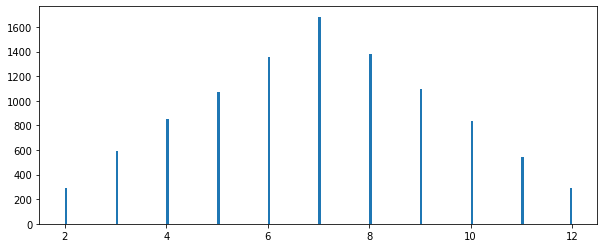

In [ ]:
import pylab as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 4)

def dice_histogram(dice_count, rolls_count, bins):
    """Plots outcome of many dice rolls
    
    Args:
        dice_count (int): number of dice to roll
        rolls_count (int): number of rolls to do
        bins (int): number of histogram bins
        
    """
    plt.hist(dice_rolls(dice_count, rolls_count),bins)
    plt.show()
    
dice_histogram(2, 10000, 200)

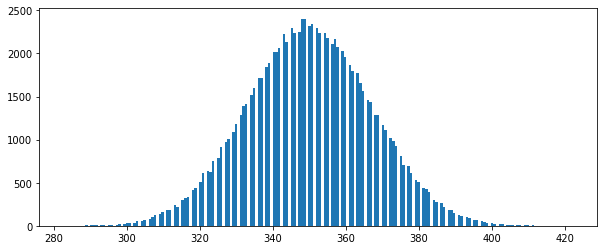

12.930852890014648 seconds


In [ ]:
import time
start = time.time()

dice_histogram(100, 100000, 200)

print(time.time()-start, 'seconds')

[12, 7, 8, 10, 3, 3, 4, 4, 6, 12, 5, 7, 8, 5, 6, 6, 7, 3, 9, 6, 8, 9, 7, 11, 7, 7, 7, 9, 9, 3, 12, 9, 6, 5, 4, 5, 7, 7, 4, 8, 10, 5, 10, 7, 9, 5, 11, 8, 3, 8, 7, 11, 8, 8, 4, 12, 7, 11, 7, 7, 7, 8, 10, 7, 9, 5, 8, 6, 5, 4, 7, 6, 9, 8, 2, 7, 6, 11, 6, 8, 4, 12, 8, 5, 8, 7, 5, 5, 6, 7, 12, 10, 7, 7, 5, 8, 8, 10, 3, 8]


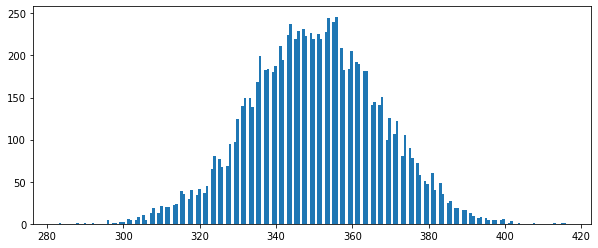

0.5116491317749023 seconds
1.27 ms ± 8.68 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
145 ms ± 33.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
import numpy as np
np.random.randint(1,7,(2,10))
np.sum(np.random.randint(1,7,(2,10)),axis=0)

def dice_rolls_np(dice_count, rolls_count):
    """Return list of many dice rolls
    
    Args:
        dice_count (int): number of dice to roll
        rolls_count (int): number of rolls to do
        
    Returns:
        np.array: list of dice roll values.
        
    """
    
    return np.sum(
        np.random.randint(1,7,(dice_count,rolls_count)),
        axis=0)


print(dice_rolls(2,100))

def dice_histogram_np(dice_count, rolls_count, bins):
    """Plots outcome of many dice rolls
    
    Args:
        dice_count (int): number of dice to roll
        rolls_count (int): number of rolls to do
        bins (int): number of histogram bins
        
    """
    plt.hist(dice_rolls_np(dice_count, rolls_count),bins)
    plt.show()
    
start = time.time()

dice_histogram_np(100, 10000, 200)

print(time.time()-start, 'seconds')

%timeit dice_rolls_np(100, 1000)
%timeit dice_rolls(100, 1000)

0 -2 2 0 0 0 2 -2 -2 0 0 0 2 0 -2 -2 2 -2 2 2 2 2 -2 2 -2 0 2 2 -2 -2 -2 -2 0 2 2 2 2 -2 0 0 0 2 0 0 2 -2 2 2 -2 0 

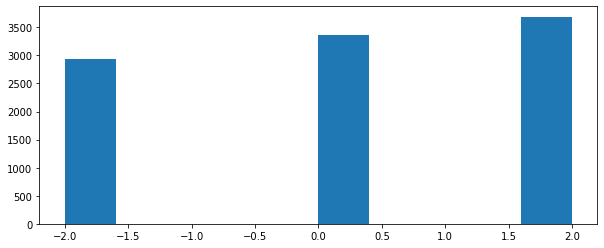

0.1704

In [ ]:
def risk_battle():
    """Risk battle simulation"""
    
    # get array of three dice values
    attacking_dice = np.random.randint(1,7,3)
    
    # get array of two dice values
    defending_dice = np.random.randint(1,7,2)
    
    # sort both sets and take top two values
    attacking_dice_sorted = np.sort(attacking_dice)[::-1]
    defending_dice_sorted = np.sort(defending_dice)[::-1]
    
    # are the attacking values greater?
    attack_wins = attacking_dice_sorted[:2] > defending_dice_sorted[:2]
    
    # convert boolean values to -1, +1
    attack_wins_pm = attack_wins*2 - 1
    
    # sum up these outcomes
    return np.sum(attack_wins_pm)
    
for _ in range(50):
    print(risk_battle(), end=' ')
outcomes = [risk_battle() for _ in range(10000)]
plt.hist(outcomes)
plt.show()

np.mean([risk_battle() for _ in range(10000)])

source: https://notebook.community/gte620v/PythonTutorialWithJupyter/exercises/solutions/Ex1-Dice_Simulation_solutions